#                                         Insurance Claim-FraudDetection

In [1]:
#ImportinLibraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns
from plotly.subplots import make_subplots
from sklearn import metrics

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


# DataAnalysing

In [3]:
df.columns
#Columns of dataset

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
df.shape
#Shape of the dataset..

(1000, 40)

In [5]:
df.dtypes
#Tpyes of values in columns of dataset..

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.nunique()
#Unique values in each columns of the dataset..

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
#dropping _c39 columns
df.drop('_c39',axis=1,inplace=True)

In [10]:
# printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('***************')

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
***************
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
***************
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
***************
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
***************
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
***************
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
far

In [11]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# EDA

Text(0.5, 1.0, 'Fraud Detection')

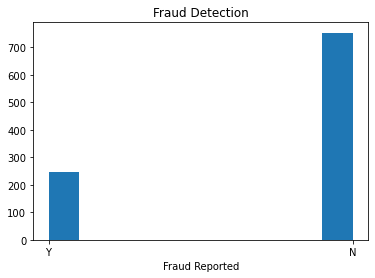

In [12]:
#Histogram plot for Fraud detection of given data.
plt.hist(df['fraud_reported'])
plt.xlabel('Fraud Reported')
plt.title('Fraud Detection')

In [13]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

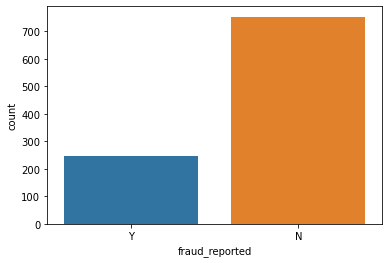

In [14]:
sns.countplot(df['fraud_reported'])

In [15]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


<function matplotlib.pyplot.show(close=None, block=None)>

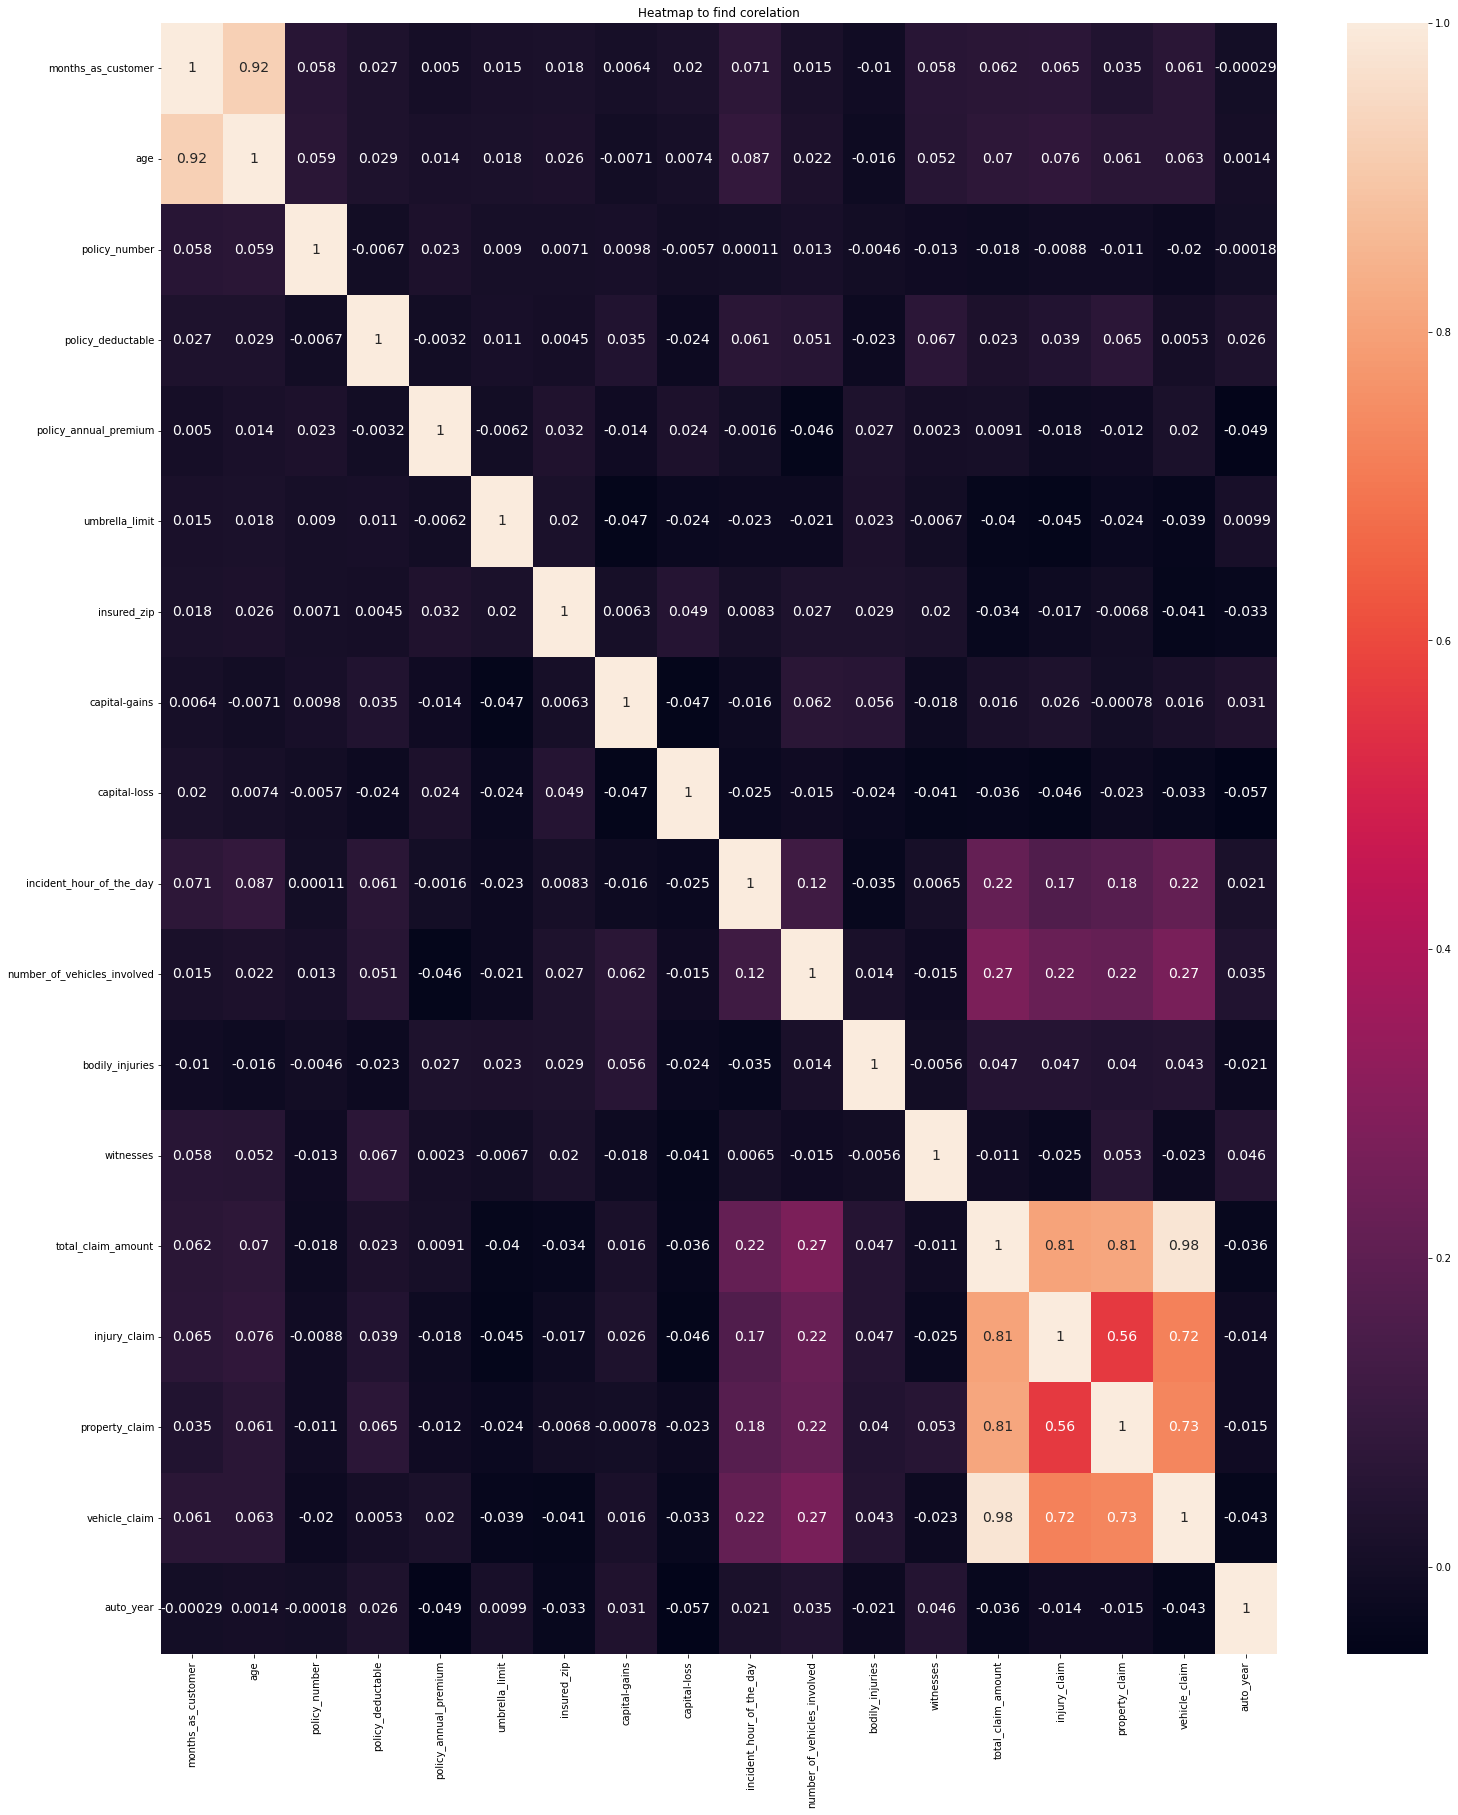

In [16]:
corr=df.corr()
plt.figure(figsize=(25,30))
sns.heatmap(corr,annot=True,annot_kws={'size':14})
plt.title("Heatmap to find corelation")
plt.show

<AxesSubplot:title={'center':'Monthly Customer'}, xlabel='months_as_customer', ylabel='Density'>

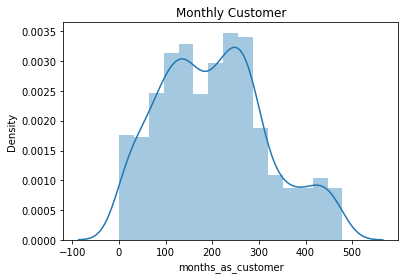

In [17]:
# Distplot Display distribution of data across monthly charges.
plt.title('Monthly Customer')
sns.distplot(df['months_as_customer'],kde=True)

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

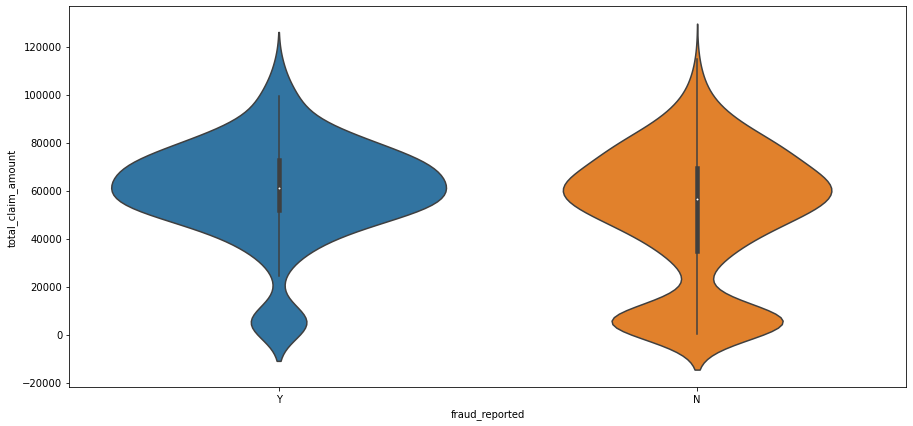

In [18]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='total_claim_amount',x='fraud_reported',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

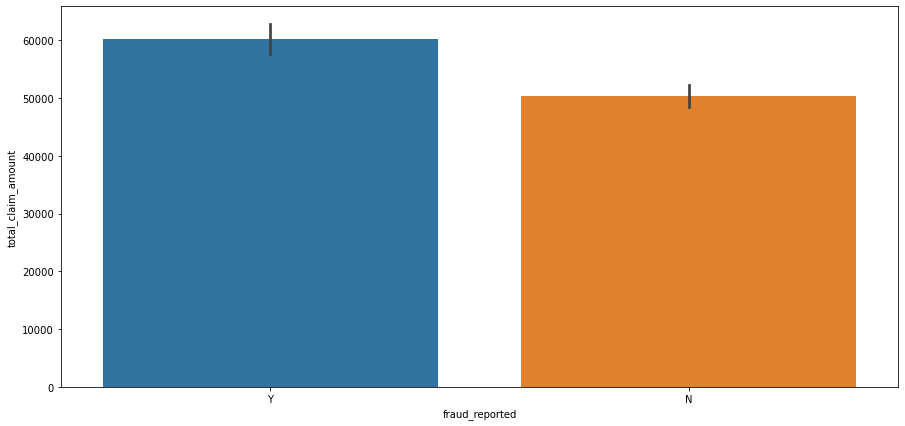

In [19]:
plt.figure(figsize=(15, 7))
sns.barplot(y='total_claim_amount',x='fraud_reported',data=df)

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

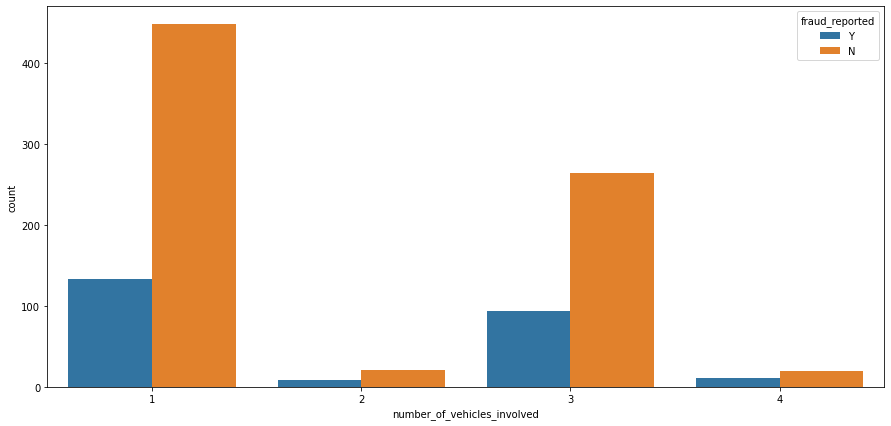

In [20]:
plt.figure(figsize=(15, 7))
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_city', ylabel='count'>

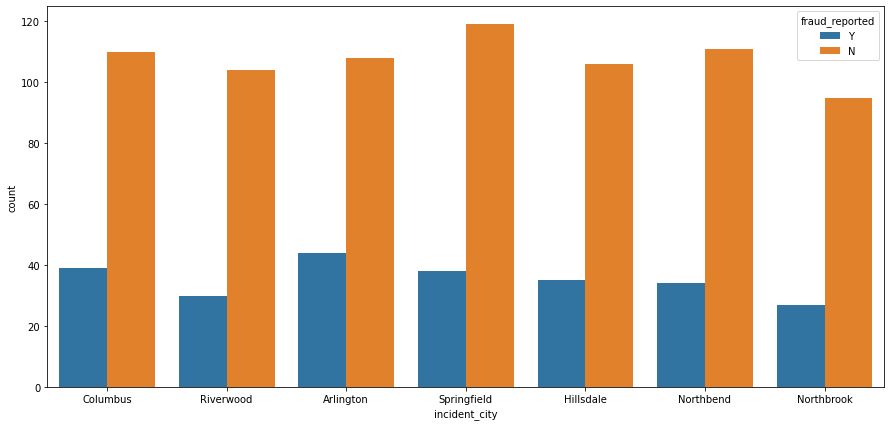

In [21]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_city',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_state', ylabel='count'>

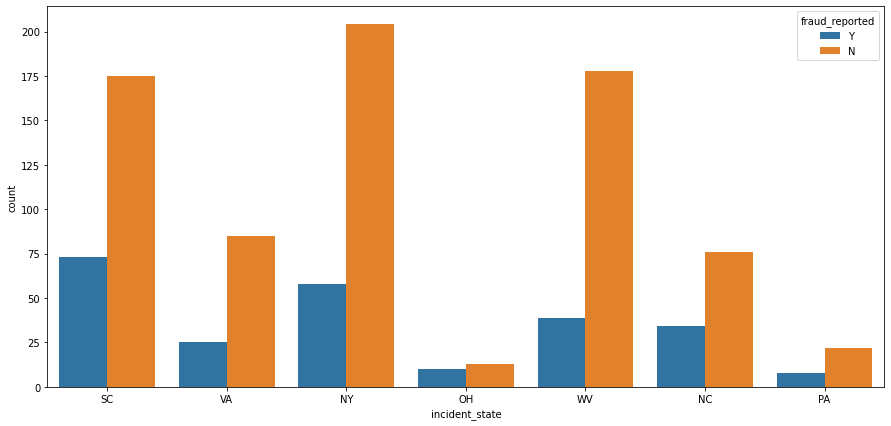

In [22]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_state',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

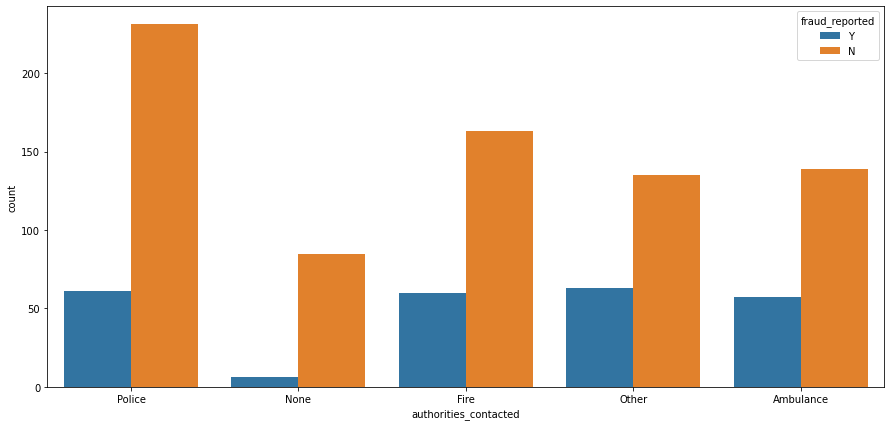

In [23]:
plt.figure(figsize=(15, 7))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

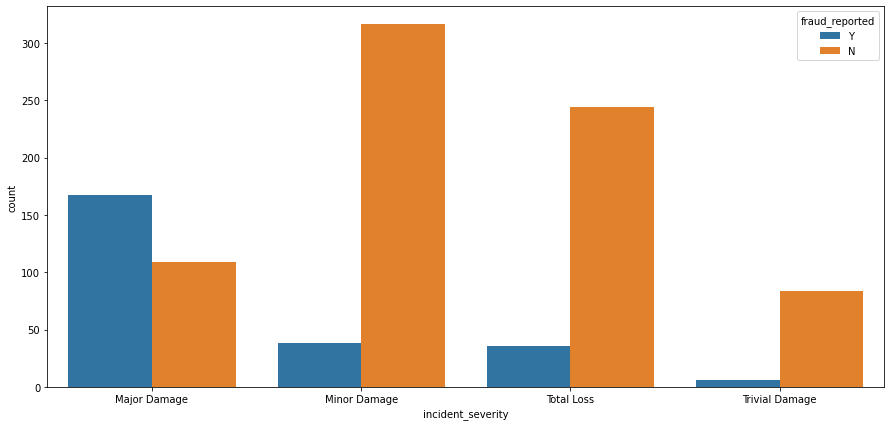

In [24]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='collision_type', ylabel='count'>

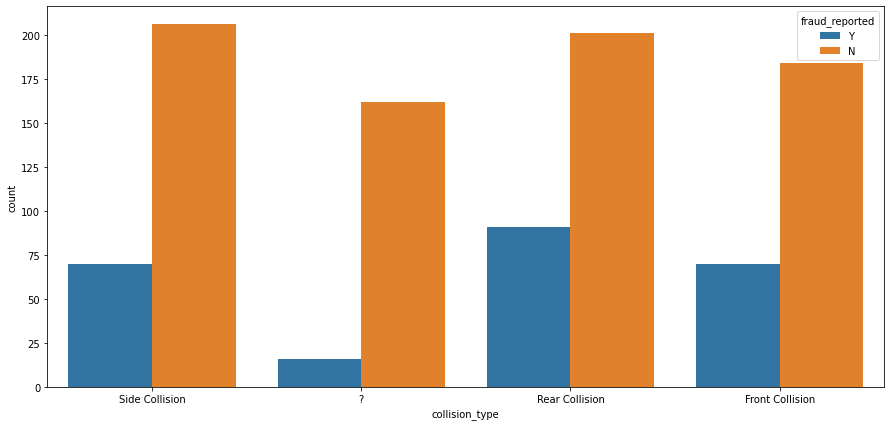

In [25]:
plt.figure(figsize=(15, 7))
sns.countplot(x='collision_type',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_type', ylabel='count'>

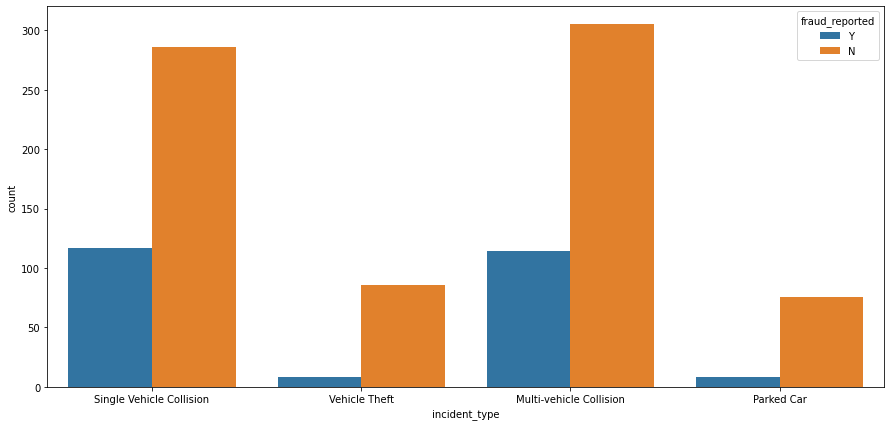

In [26]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_type',hue='fraud_reported',data=df)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

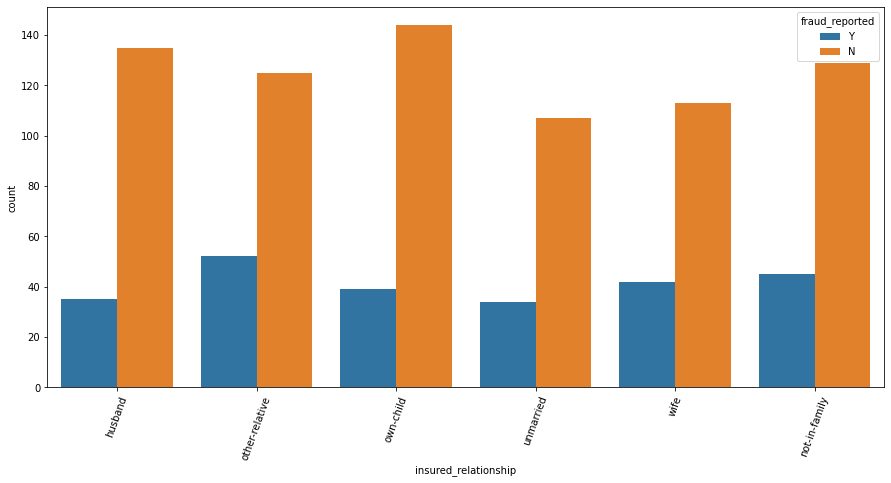

In [27]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

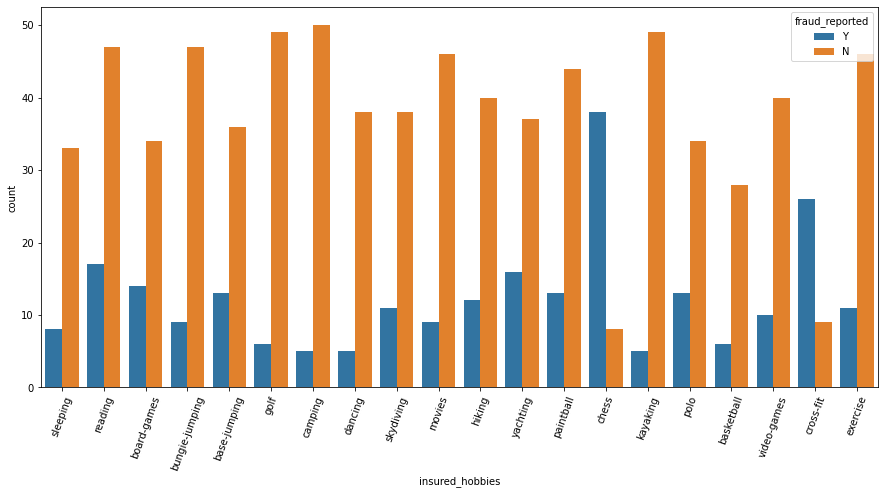

In [28]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

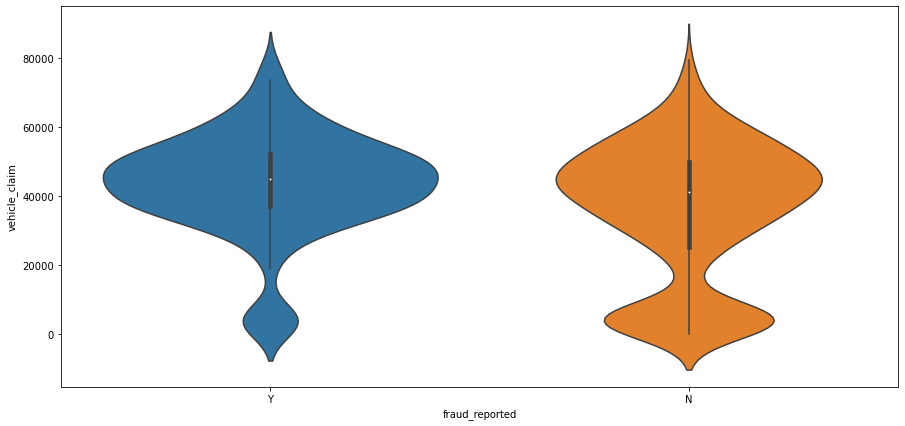

In [29]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='vehicle_claim',x='fraud_reported',data=df)

<AxesSubplot:title={'center':'Umbrella Limit vs Fraud reported'}, xlabel='umbrella_limit', ylabel='count'>

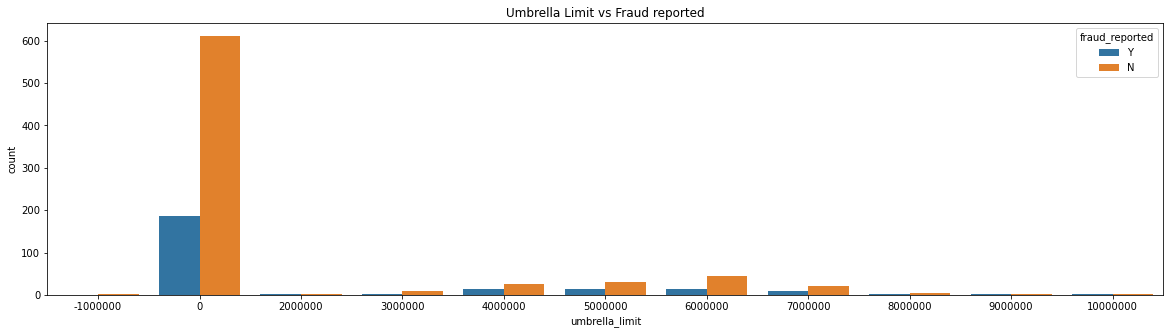

In [30]:
plt.subplots(figsize=(20,5))
plt.title('Umbrella Limit vs Fraud reported')
sns.countplot(x='umbrella_limit',hue='fraud_reported',data=df)

<AxesSubplot:title={'center':'Insured Education Level'}, xlabel='insured_education_level', ylabel='count'>

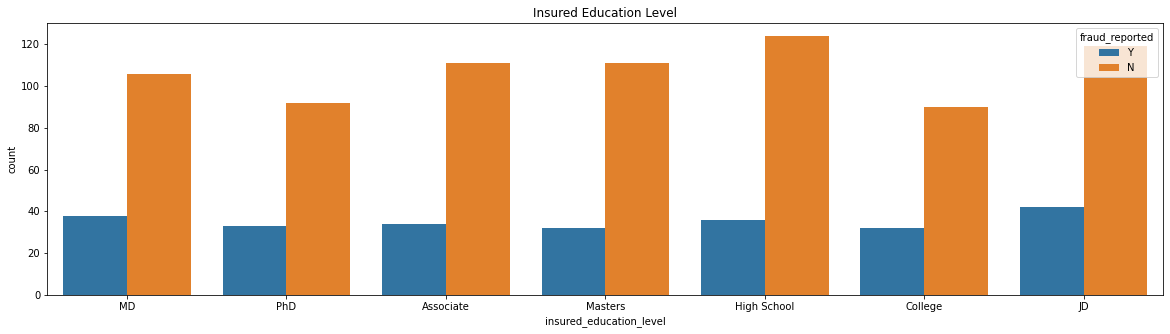

In [31]:
plt.subplots(figsize=(20,5))
plt.title('Insured Education Level')
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df)

<AxesSubplot:title={'center':'Insured Occupation Level'}, xlabel='insured_occupation', ylabel='count'>

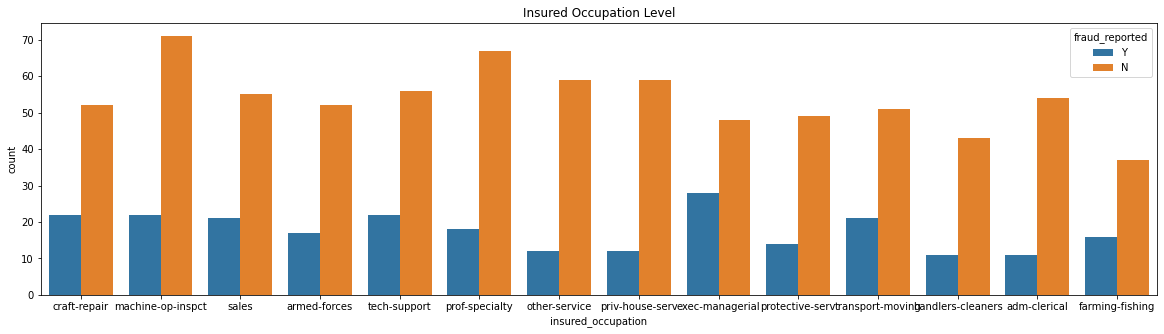

In [32]:
plt.subplots(figsize=(20,5))
plt.title('Insured Occupation Level')
sns.countplot(x='insured_occupation',hue='fraud_reported',data=df)

In [33]:
#The Countplot clears that according to their occupation level fraud report is generated.

<AxesSubplot:title={'center':'Automobiles Manufactured Companies'}, xlabel='auto_make', ylabel='count'>

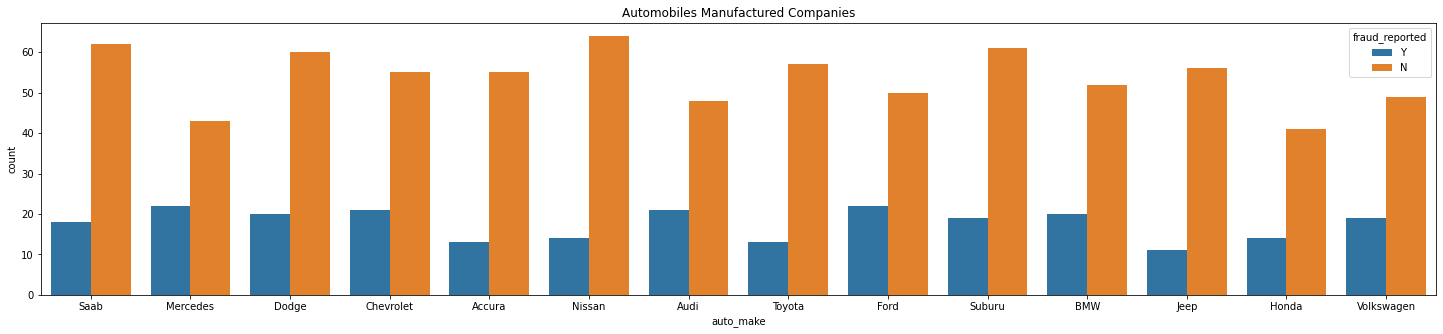

In [34]:
plt.subplots(figsize=(25,5))
plt.title('Automobiles Manufactured Companies')
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

<AxesSubplot:title={'center':'Automobiles Model'}, xlabel='auto_model', ylabel='count'>

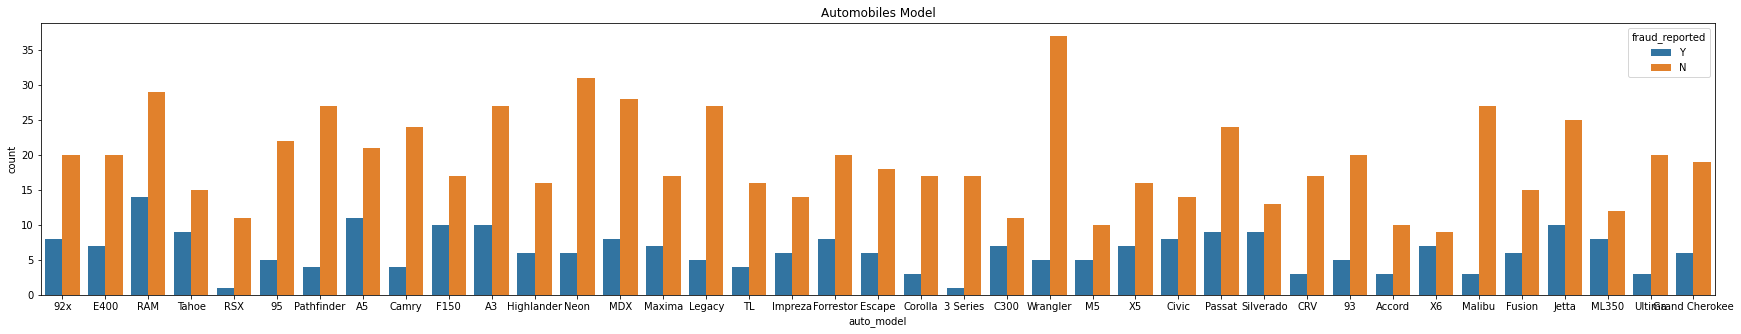

In [35]:
plt.subplots(figsize=(30,5))
plt.title('Automobiles Model')
sns.countplot(x='auto_model',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

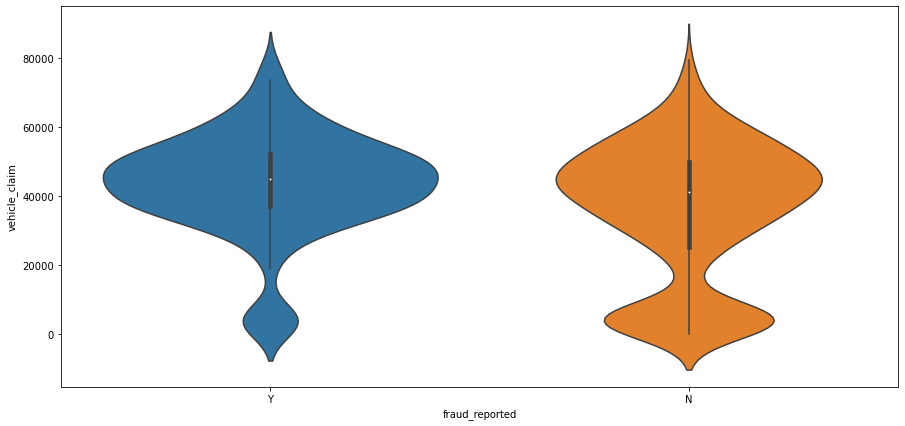

In [36]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='vehicle_claim',x='fraud_reported',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

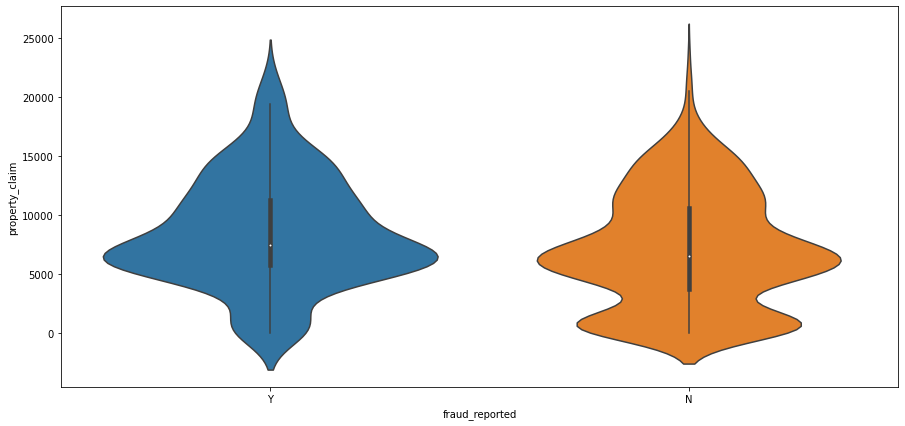

In [37]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='property_claim',x='fraud_reported',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

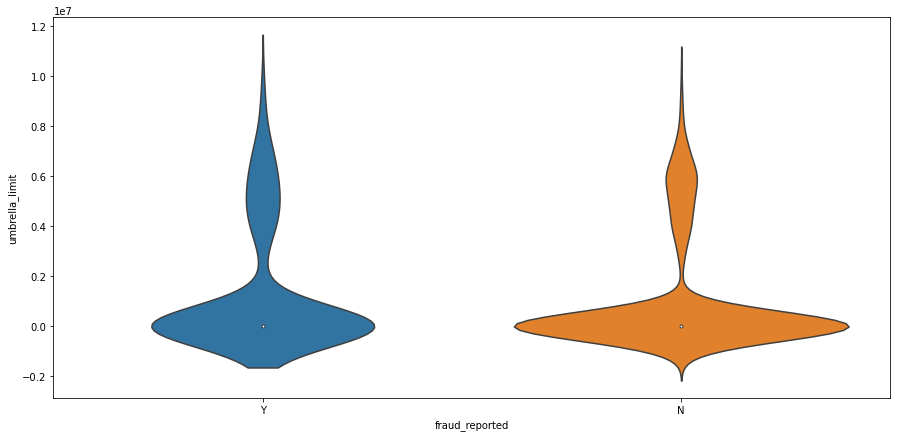

In [38]:
plt.figure(figsize=(15, 7))
sns.violinplot(x='fraud_reported',y='umbrella_limit',data= df )

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

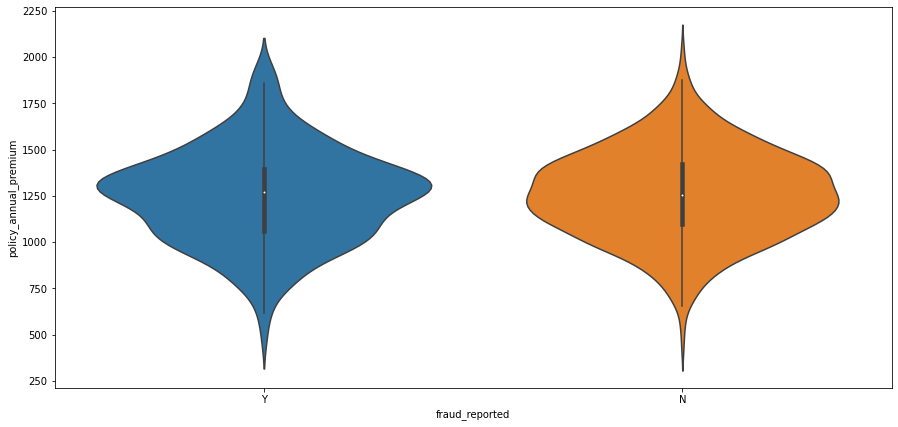

In [39]:
plt.figure(figsize=(15, 7))
sns.violinplot(x='fraud_reported',y='policy_annual_premium',data= df )

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

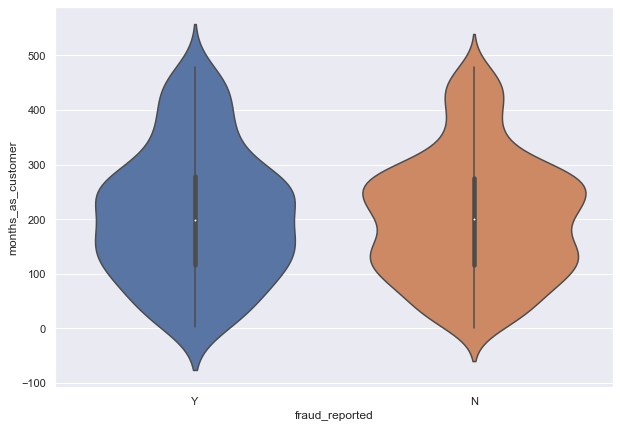

In [40]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.violinplot(y='months_as_customer',x='fraud_reported',data= df )

# Skewness

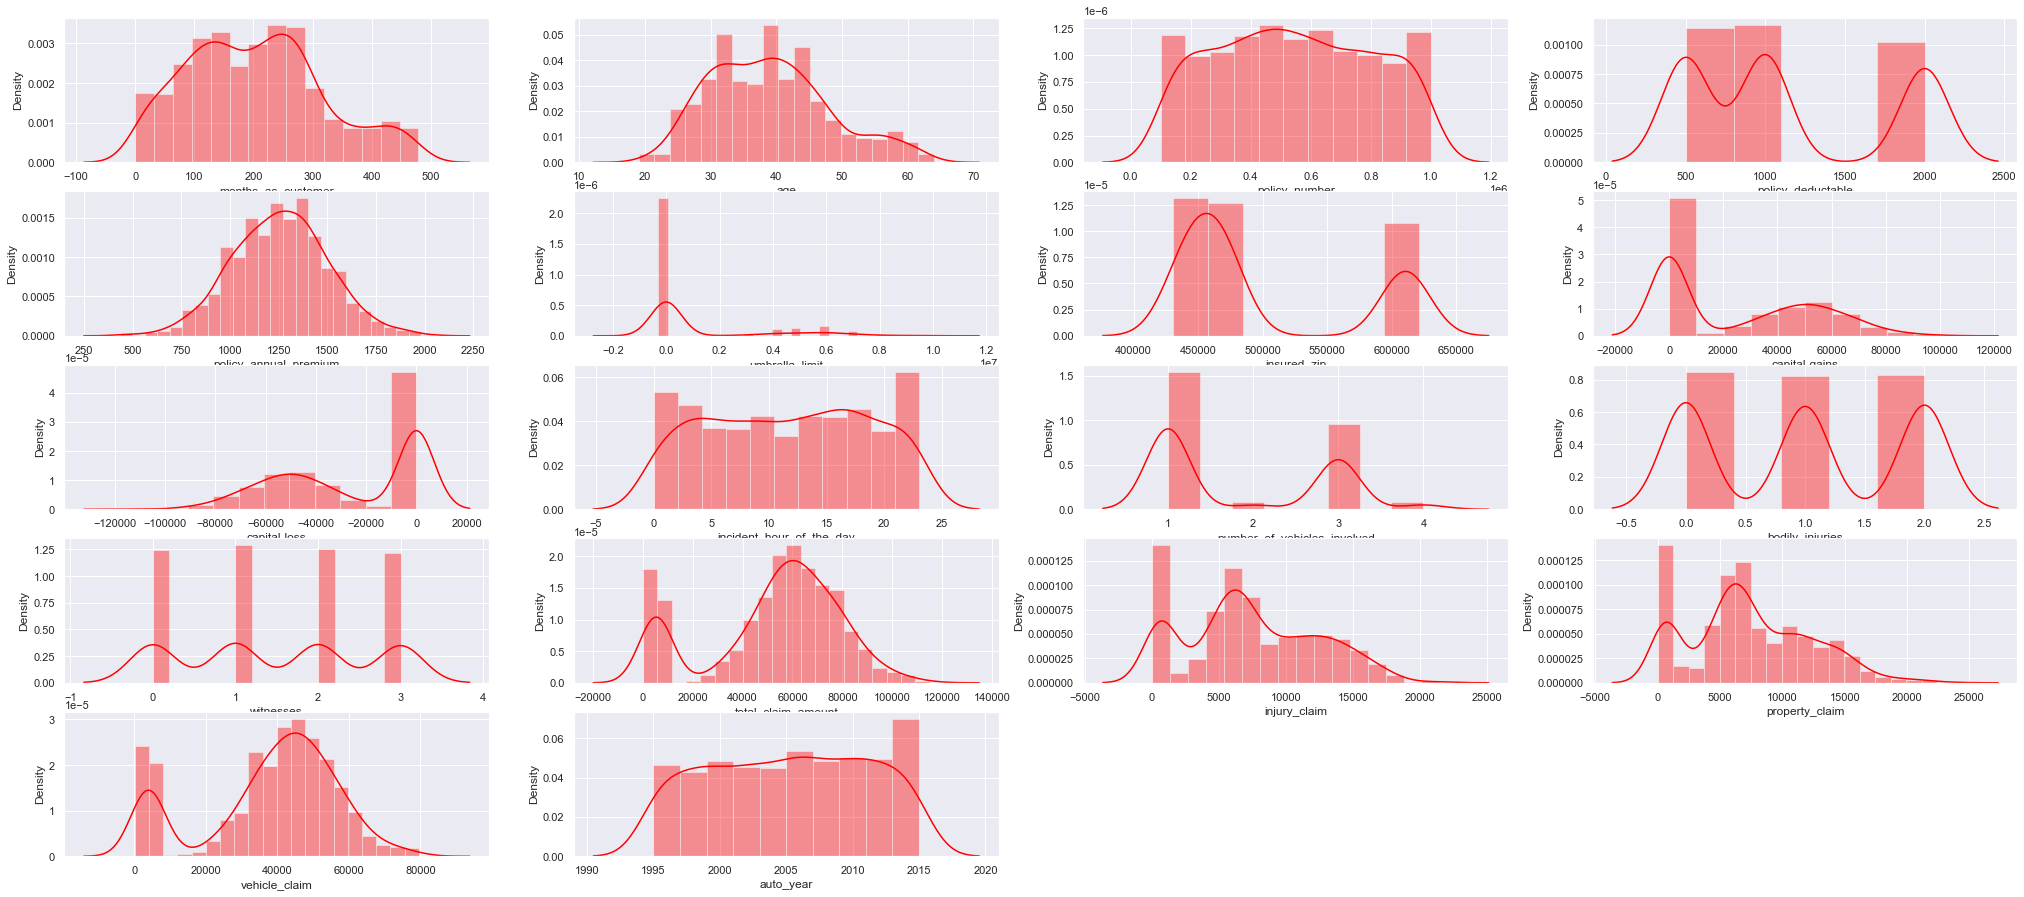

In [41]:
plt.figure(figsize=(35,25))
for i in enumerate(df.select_dtypes(include=['int64', 'float','int32'])):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='red')

In [42]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

# skewness more than+/- 0.5 will we treated

# Power Transform to treat skewness

In [43]:
from sklearn.preprocessing import power_transform


In [44]:
df[['umbrella_limit','total_claim_amount','vehicle_claim']]=power_transform(
    df[['umbrella_limit','total_claim_amount','vehicle_claim']],method='yeo-johnson')

In [45]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                -7.865930
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.510354
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.522718
auto_year                     -0.048289
dtype: float64

# Outliers

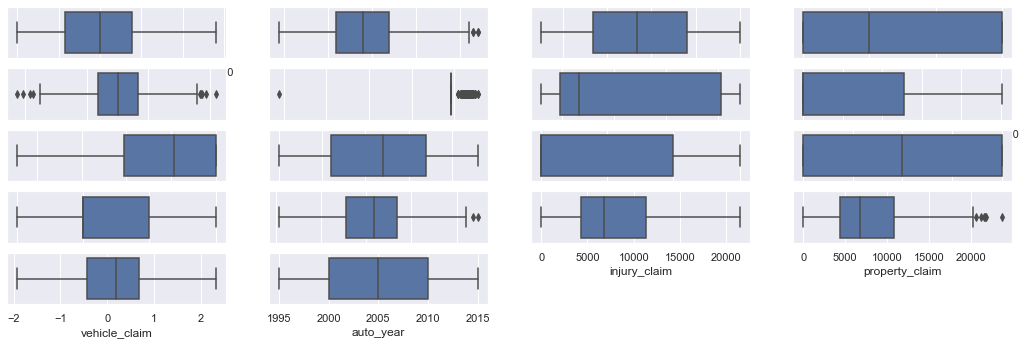

In [46]:
plt.figure(figsize=(18,10))
for o in enumerate(df.select_dtypes(include=['int64', 'float','int32'])):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

# Zscore

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(df.select_dtypes(include=['int64', 'float','int32'])))
print(np.where(z>3))

(array([229, 248, 290, 500, 763, 807], dtype=int64), array([ 4,  4,  5, 15,  4,  8], dtype=int64))


In [48]:
df1=df[(z<3).all(axis=1)]

In [49]:
df.shape


(1000, 39)

In [50]:
df1.shape

(994, 39)

In [51]:
(df.shape[0]-df1.shape[0])/df.shape[0]*100

0.6

# IQR

In [52]:
from scipy import stats 
IQR = stats.iqr(df.select_dtypes(include=['int64', 'float','int32'])) 
IQR 

2006.3155147332695

In [53]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df.select_dtypes(include=['int64', 'float','int32'])[~((df.select_dtypes(include=['int64', 'float','int32']) < (Q1 - 1.5 * IQR)) |(df.select_dtypes(include=['int64', 'float','int32']) > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(99, 18)


In [54]:
df=df1

# Encoding-LabelEncoder

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
LE=LabelEncoder()
categ_data = df.select_dtypes(exclude=['int64', 'float','int32'])
for val in categ_data:
    df[val]=LE.fit_transform(df[val].astype(str))

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_number                994 non-null    int64  
 3   policy_bind_date             994 non-null    int32  
 4   policy_state                 994 non-null    int32  
 5   policy_csl                   994 non-null    int32  
 6   policy_deductable            994 non-null    int64  
 7   policy_annual_premium        994 non-null    float64
 8   umbrella_limit               994 non-null    float64
 9   insured_zip                  994 non-null    int64  
 10  insured_sex                  994 non-null    int32  
 11  insured_education_level      994 non-null    int32  
 12  insured_occupation           994 non-null    int32  
 13  insured_hobbies     

# Splitting data into Xand Y

In [58]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

# Minmax Scaler

In [59]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [60]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
dtype: int64

In [61]:
pd.DataFrame(x).describe()
#Data have been scaled..

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,...,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.426698,0.443975,0.496342,0.498921,0.507042,0.474849,0.424883,0.502476,0.120736,0.371893,...,0.496982,0.493628,0.485412,0.438078,0.345997,0.337963,0.452749,0.504179,0.508790,0.505785
std,0.240313,0.203319,0.285929,0.289798,0.415523,0.402499,0.408046,0.168078,0.247854,0.375109,...,0.409469,0.370100,0.405201,0.227234,0.227594,0.219722,0.235056,0.310061,0.293301,0.300326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242171,0.288889,0.262562,0.245767,0.000000,0.000000,0.000000,0.385783,0.000000,0.096387,...,0.000000,0.083333,0.000000,0.336883,0.199767,0.203347,0.349244,0.230769,0.263158,0.250000
50%,0.417537,0.422222,0.482576,0.496825,0.500000,0.500000,0.333333,0.502305,0.000000,0.190411,...,0.500000,0.333333,0.500000,0.478892,0.315152,0.308803,0.500086,0.538462,0.526316,0.500000
75%,0.577766,0.572222,0.733355,0.750000,1.000000,1.000000,1.000000,0.613049,0.000000,0.906816,...,1.000000,0.666667,1.000000,0.591472,0.525175,0.497707,0.613166,0.769231,0.763158,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting Train and test

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [65]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.822742474916388  on Random_state  103


# ModelBuilding

# LogisticRegression

In [66]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7859531772575251
[[213  13]
 [ 51  22]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       226
           1       0.63      0.30      0.41        73

    accuracy                           0.79       299
   macro avg       0.72      0.62      0.64       299
weighted avg       0.76      0.79      0.76       299



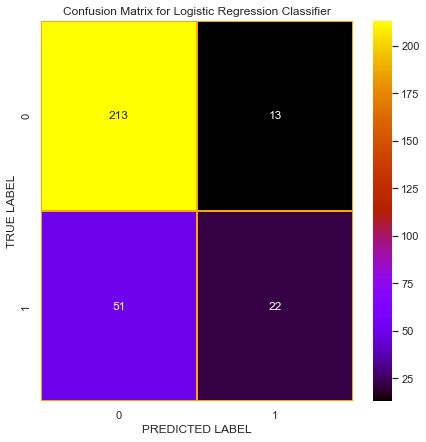

In [67]:
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="orange", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [68]:
print(cross_val_score(LR,x,y,cv=5).mean())

0.7736612354702805


# RandomForestClassifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

# Prediction
predRF = RF.predict(x_test)

print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test,predRF))

0.7591973244147158
[[210  16]
 [ 56  17]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       226
           1       0.52      0.23      0.32        73

    accuracy                           0.76       299
   macro avg       0.65      0.58      0.59       299
weighted avg       0.72      0.76      0.72       299



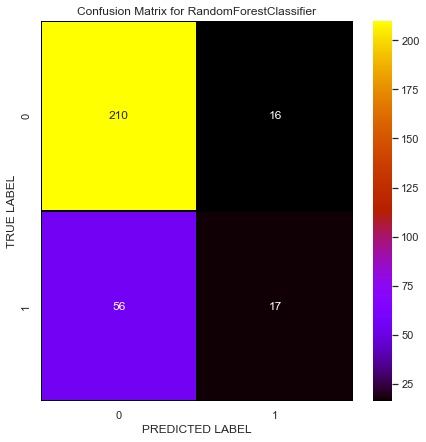

In [71]:
cm = confusion_matrix(y_test,predRF)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [72]:
print(cross_val_score(RF,x,y,cv=5).mean())

0.7676209329475661


# AdaBosstClassifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier

In [74]:
ADA = AdaBoostClassifier()
ADA.fit(x_train,y_train)

# Prediction
predADA = ADA.predict(x_test)

print(accuracy_score(y_test, predADA))
print(confusion_matrix(y_test, predADA))
print(classification_report(y_test,predADA))

0.7959866220735786
[[201  25]
 [ 36  37]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       226
           1       0.60      0.51      0.55        73

    accuracy                           0.80       299
   macro avg       0.72      0.70      0.71       299
weighted avg       0.79      0.80      0.79       299



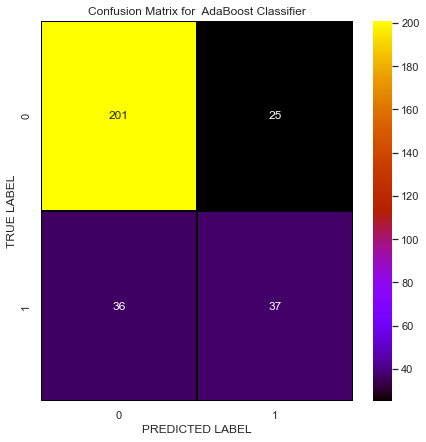

In [75]:
cm = confusion_matrix(y_test,predADA)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

In [76]:
print(cross_val_score(ADA,x,y,cv=5).mean())

0.7897771686716412


# KNeighborsClassifier 

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6989966555183946
[[200  26]
 [ 64   9]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       226
           1       0.26      0.12      0.17        73

    accuracy                           0.70       299
   macro avg       0.51      0.50      0.49       299
weighted avg       0.64      0.70      0.66       299

Training accuracy:: 0.8014388489208633
Test accuracy:: 0.6989966555183946


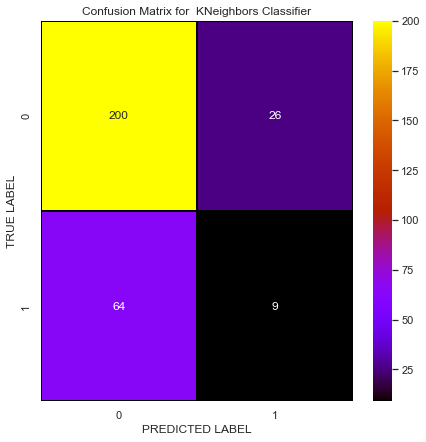

In [79]:
cm = confusion_matrix(y_test,pred_knn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  KNeighbors Classifier')
plt.show()

In [80]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.7213237906705243


# DecisionTreeClassifier

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
print(accuracy_score(y_test,pred_DT))
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test,pred_DT))
print("Training accuracy::",DT.score(x_train,y_train))
print("Test accuracy::",DT.score(x_test,y_test))

0.7859531772575251
[[190  36]
 [ 28  45]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       226
           1       0.56      0.62      0.58        73

    accuracy                           0.79       299
   macro avg       0.71      0.73      0.72       299
weighted avg       0.79      0.79      0.79       299

Training accuracy:: 1.0
Test accuracy:: 0.7859531772575251


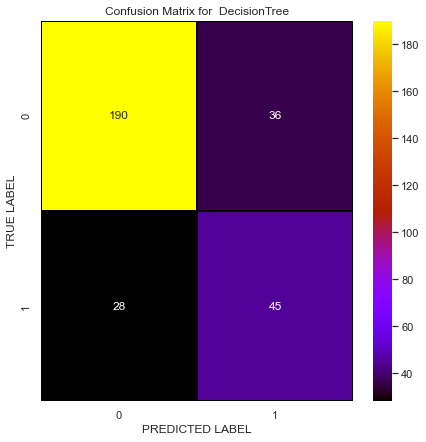

In [83]:
cm = confusion_matrix(y_test,pred_DT)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  DecisionTree')
plt.show()

In [84]:
print(cross_val_score(DT,x,y,cv=5).mean())

0.7776661083193745


# BaggingClassifier

In [85]:
from sklearn.ensemble import BaggingClassifier

In [86]:
BAG=BaggingClassifier()
BAG.fit(x_train,y_train)
pred_BAG=BAG.predict(x_test)
print(accuracy_score(y_test,pred_BAG))
print(confusion_matrix(y_test,pred_BAG))
print(classification_report(y_test,pred_BAG))
print("Training accuracy::",BAG.score(x_train,y_train))
print("Test accuracy::",BAG.score(x_test,y_test))

0.7926421404682275
[[200  26]
 [ 36  37]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       226
           1       0.59      0.51      0.54        73

    accuracy                           0.79       299
   macro avg       0.72      0.70      0.70       299
weighted avg       0.78      0.79      0.79       299

Training accuracy:: 0.9899280575539569
Test accuracy:: 0.7926421404682275


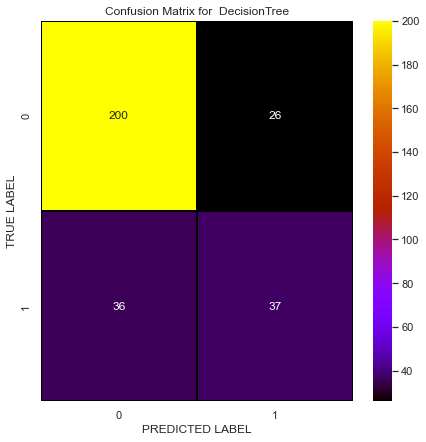

In [87]:
cm = confusion_matrix(y_test,pred_BAG)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  DecisionTree')
plt.show()

In [88]:
print(cross_val_score(BAG,x,y,cv=5).mean())

0.8048423937871174


# GradientBoostClassifier

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
GRA=GradientBoostingClassifier()
GRA.fit(x_train,y_train)
pred_GRA=GRA.predict(x_test)
print(accuracy_score(y_test,pred_GRA))
print(confusion_matrix(y_test,pred_GRA))
print(classification_report(y_test,pred_GRA))
print("Training accuracy::",GRA.score(x_train,y_train))
print("Test accuracy::",GRA.score(x_test,y_test))

0.8127090301003345
[[199  27]
 [ 29  44]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       226
           1       0.62      0.60      0.61        73

    accuracy                           0.81       299
   macro avg       0.75      0.74      0.74       299
weighted avg       0.81      0.81      0.81       299

Training accuracy:: 0.9827338129496402
Test accuracy:: 0.8127090301003345


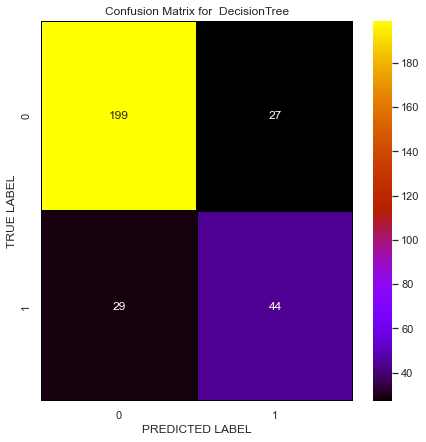

In [109]:
cm = confusion_matrix(y_test,pred_GRA)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  DecisionTree')
plt.show()

In [110]:
print(cross_val_score(GRA,x,y,cv=5).mean())

0.8380539058931017


In [111]:
GRA=GradientBoostingClassifier()
param_grid={
    'criterion' : ['mse', 'mae'],
    'n_estimators':[10,20],
    'learning_rate':[0.1,0.5,1.0],
     'random_state':[5]              
}

In [112]:
GRA_grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=1)

In [113]:
GRA_grid.fit(x_train,y_train)
GRA_pred=GRA_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,GRA_pred))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Accuracy after parameter tuning:: 0.8160535117056856


In [114]:
GRA_grid.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'n_estimators': 20,
 'random_state': 5}

In [115]:
best_param={
    'criterion' : ['mse'],
    'n_estimators':[10],
    'learning_rate':[0.5],
     'random_state':[5]    }  

In [116]:
best_GRA_grid=GridSearchCV(GradientBoostingClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [117]:
best_GRA_grid.fit(x_train,y_train)
best_GRA_pred=best_GRA_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_GRA_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.802675585284281


# GradientBoostingClassifier-Report

In [118]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_GRA_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       226
           1       0.60      0.59      0.59        73

    accuracy                           0.80       299
   macro avg       0.73      0.73      0.73       299
weighted avg       0.80      0.80      0.80       299



In [119]:
from sklearn.metrics import roc_auc_score

In [120]:
print("roc auc score::",roc_auc_score(y_test, best_GRA_pred))

roc auc score:: 0.7303612559098073


In [122]:
from sklearn.metrics import roc_curve

In [124]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_GRA_pred, pos_label=1)

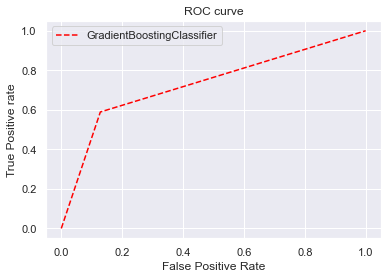

In [125]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='GradientBoostingClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Concluding

In [126]:
print("Logistic Regression Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(predLR, y_test)))
print("Random Forest Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(predRF, y_test)))
print("K-Nearest Neighbors Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(pred_knn, y_test)))
print("DecisionTreeClassifier: {:.2f}% Accuracy".format( 100 * accuracy_score(pred_DT, y_test)))
print("AdaBoostClassifier: {:.2f}% Accuracy".format( 100 * accuracy_score(predADA, y_test)))
print("BaggingClassifier: {:.2f}% Accuracy".format( 100 * accuracy_score(pred_BAG, y_test)))
print("GradientBoostingclassifier: {:.2f}% Accuracy".format( 100 * accuracy_score(pred_GRA, y_test)))

Logistic Regression Classifier: 78.60% Accuracy
Random Forest Classifier: 75.92% Accuracy
K-Nearest Neighbors Classifier: 69.90% Accuracy
DecisionTreeClassifier: 78.60% Accuracy
AdaBoostClassifier: 79.60% Accuracy
BaggingClassifier: 79.26% Accuracy
GradientBoostingclassifier: 81.27% Accuracy


# Model Saving

In [128]:
import joblib
joblib.dump(best_GRA_grid.best_estimator_,'InsuranceClaim-Fraud.obj')

['InsuranceClaim-Fraud.obj']